In [20]:
import pandas as pd

In [21]:
uriage_data=pd.read_csv("uriage.csv")

In [22]:
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [23]:
kokyaku_data=pd.read_excel("kokyaku_daicho.xlsx")

In [24]:
kokyaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [25]:
uriage_data["item_name"].head()

0      상품A
1    상 품 S
2    상 품 a
3      상품Z
4      상품a
Name: item_name, dtype: object

In [26]:
uriage_data["item_price"].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

In [27]:
uriage_data["purchase_date"]=pd.to_datetime(uriage_data["purchase_date"])
uriage_data["purchase_month"]=uriage_data["purchase_date"].dt.strftime("%Y%m")
res=uriage_data.pivot_table(index="purchase_month", columns="item_name",
                            aggfunc="size", fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [28]:
res=uriage_data.pivot_table(index="purchase_month", columns="item_name",
                           values="item_price", aggfunc="sum", fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1400,0,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,2400,0,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
201903,0,500,1300,1600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,2300,0,1700,...,0,0,0,0,0,1900,0,0,0,0
201905,0,0,0,0,1900,0,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
201906,0,0,0,0,0,2300,0,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
201907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


In [29]:
print(len(pd.unique(uriage_data["item_name"])))

99


In [30]:
uriage_data["item_name"]=uriage_data["item_name"].str.upper()

In [31]:
uriage_data["item_name"]=uriage_data["item_name"].str.replace(" ","")

In [32]:
uriage_data["item_name"]=uriage_data["item_name"].str.replace("  ","")

In [33]:
uriage_data.sort_values(by=["item_name"], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1748,2019-05-19 20:22:00,상품A,100.0,김시훈,201905
223,2019-06-25 08:13:00,상품A,100.0,김유진,201906
1742,2019-06-13 16:03:00,상품A,100.0,김건희,201906
1738,2019-02-10 00:28:00,상품A,100.0,김하랑,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱,201904
2881,2019-04-30 14:21:00,상품Y,NaN,김하준,201904
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준,201901
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현,201905


In [34]:
print(len(pd.unique(uriage_data["item_name"])))

26


In [35]:
print(pd.unique(uriage_data["item_name"]))

['상품A' '상품S' '상품Z' '상품V' '상품O' '상품U' '상품L' '상품C' '상품I' '상품R' '상품X' '상품G'
 '상품P' '상품Q' '상품Y' '상품N' '상품W' '상품E' '상품K' '상품B' '상품F' '상품D' '상품M' '상품H'
 '상품T' '상품J']


In [36]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [38]:
uriage_data.sort_value(by=["item_name"]).ascending

AttributeError: 'DataFrame' object has no attribute 'sort_value'

In [39]:
flg_is_null=uriage_data["item_price"].isnull()
for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
    price=uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"]==trg),"item_price"].max()
    uriage_data["item_price"].loc[(flg_is_null)&(uriage_data["item_name"]==trg)]=price
uriage_data.head()

C:\Users\seulki oh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상품S,1900.0,김우찬,201907
2,2019-05-11 19:42:00,상품A,100.0,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품A,100.0,김강현,201904


In [40]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_month    False
dtype: bool

In [41]:
for trg in list(uriage_data["item_name"].sort_values().unique()):
    print(trg+"의 최고가:"+str(uriage_data.loc[uriage_data["item_name"]==trg]
            ["item_price"].max())+"의 최저가:"+str(uriage_data.loc[uriage_data
            ["item_name"]==trg]["item_price"].min(skipna=False)))

상품A의 최고가:100.0의 최저가:100.0
상품B의 최고가:200.0의 최저가:200.0
상품C의 최고가:300.0의 최저가:300.0
상품D의 최고가:400.0의 최저가:400.0
상품E의 최고가:500.0의 최저가:500.0
상품F의 최고가:600.0의 최저가:600.0
상품G의 최고가:700.0의 최저가:700.0
상품H의 최고가:800.0의 최저가:800.0
상품I의 최고가:900.0의 최저가:900.0
상품J의 최고가:1000.0의 최저가:1000.0
상품K의 최고가:1100.0의 최저가:1100.0
상품L의 최고가:1200.0의 최저가:1200.0
상품M의 최고가:1300.0의 최저가:1300.0
상품N의 최고가:1400.0의 최저가:1400.0
상품O의 최고가:1500.0의 최저가:1500.0
상품P의 최고가:1600.0의 최저가:1600.0
상품Q의 최고가:1700.0의 최저가:1700.0
상품R의 최고가:1800.0의 최저가:1800.0
상품S의 최고가:1900.0의 최저가:1900.0
상품T의 최고가:2000.0의 최저가:2000.0
상품U의 최고가:2100.0의 최저가:2100.0
상품V의 최고가:2200.0의 최저가:2200.0
상품W의 최고가:2300.0의 최저가:2300.0
상품X의 최고가:2400.0의 최저가:2400.0
상품Y의 최고가:2500.0의 최저가:2500.0
상품Z의 최고가:2600.0의 최저가:2600.0


In [42]:
print(trg)

상품Z


In [43]:
kokyaku_data["고객이름"].head()

0    김 현성
1    김 도윤
2    김 지한
3    김 하윤
4    김 시온
Name: 고객이름, dtype: object

In [44]:
uriage_data["customer_name"].head()

0    김가온
1    김우찬
2    김유찬
3    김재현
4    김강현
Name: customer_name, dtype: object

In [45]:
kokyaku_data["고객이름"] = kokyaku_data["고객이름"].str.replace("  ","")
kokyaku_data["고객이름"] = kokyaku_data["고객이름"].str.replace(" ","")
kokyaku_data["고객이름"].head()

0    김현성
1    김도윤
2    김지한
3    김하윤
4    김시온
Name: 고객이름, dtype: object

In [46]:
flg_is_serial=kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

22

In [47]:
fromSerial=pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "등록일"].astype("float"),
                           unit="D")+pd.to_datetime("1900/01/01")
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 등록일, dtype: datetime64[ns]

In [48]:
fromString=pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "등록일"])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 등록일, Length: 178, dtype: datetime64[ns]

In [49]:
kokyaku_data["등록일"] = pd.concat([fromSerial, fromString])
kokyaku_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-18
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-19
4,김시온,E시,2018-01-29
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [50]:
kokyaku_data["등록연월"] = kokyaku_data["등록일"].dt.strftime("%Y%m")
rslt = kokyaku_data.groupby("등록연월").count()["고객이름"]
print(rslt)
print(len(kokyaku_data))

등록연월
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 고객이름, dtype: int64
200


In [51]:
flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

0

In [52]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="left")
join_data = join_data.drop("customer_name", axis=1)
join_data

,purchase_date,item_name,item_price,purchase_month,고객이름,지역,등록일,등록연월
0,2019-06-13 18:02:00,상품A,100.0,201906,김가온,C시,2017-01-26,201701
1,2019-07-13 13:05:00,상품S,1900.0,201907,김우찬,C시,2018-04-07,201804
2,2019-05-11 19:42:00,상품A,100.0,201905,김유찬,A시,2018-06-19,201806
3,2019-02-12 23:40:00,상품Z,2600.0,201902,김재현,D시,2018-07-22,201807
4,2019-04-22 03:09:00,상품A,100.0,201904,김강현,D시,2017-06-07,201706
...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,201902,김정민,B시,2017-07-01,201707
2995,2019-06-22 04:03:00,상품M,1300.0,201906,김재원,E시,2018-03-31,201803
2996,2019-03-29 11:14:00,상품Q,1700.0,201903,김지율,B시,2017-03-15,201703
2997,2019-07-14 12:56:00,상품H,800.0,201907,김승주,E시,2018-07-15,201807


In [53]:
dump_data = join_data[["purchase_date", "purchase_month", "item_name", "item_price", "고객이름", "지역", "등록일"]]
dump_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,201902,상품Y,2500.0,김정민,B시,2017-07-01
2995,2019-06-22 04:03:00,201906,상품M,1300.0,김재원,E시,2018-03-31
2996,2019-03-29 11:14:00,201903,상품Q,1700.0,김지율,B시,2017-03-15
2997,2019-07-14 12:56:00,201907,상품H,800.0,김승주,E시,2018-07-15


In [54]:
dump_data.to_csv("dump_data.csv", index=False)

In [55]:
import_data = pd.read_csv("dump_data.csv")
import_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26 00:00:00
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07 00:00:00
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19 00:00:00
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22 00:00:00
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07 00:00:00
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,201902,상품Y,2500.0,김정민,B시,2017-07-01 00:00:00
2995,2019-06-22 04:03:00,201906,상품M,1300.0,김재원,E시,2018-03-31 00:00:00
2996,2019-03-29 11:14:00,201903,상품Q,1700.0,김지율,B시,2017-03-15 00:00:00
2997,2019-07-14 12:56:00,201907,상품H,800.0,김승주,E시,2018-07-15 00:00:00


In [56]:
byItem = import_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [57]:
byPrice = import_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
byPrice

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [58]:
byCustomer = import_data.pivot_table(index="purchase_month", columns="고객이름", aggfunc="size", fill_value=0)
byCustomer

고객이름,김가온,김강민,김강현,김건우,김건희,김경민,김규민,김규현,김다온,김대현,...,김현수,김현승,김현우,김현준,김현진,김호준,정도형,정영훈,정우석,정준기
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,2,1,2,5,3,1,1,1,5,...,3,2,4,2,1,1,4,4,4,3
201902,3,1,4,3,3,5,2,3,1,5,...,5,3,7,0,0,1,2,0,2,2
201903,4,0,3,1,1,2,2,1,1,5,...,3,2,1,2,1,2,1,2,3,4
201904,1,0,3,0,2,1,2,6,2,4,...,0,4,3,1,1,2,2,4,3,1
201905,0,0,2,2,1,4,6,3,3,1,...,2,2,1,4,3,0,0,0,1,2
201906,5,0,3,0,2,1,6,1,1,1,...,2,4,1,0,4,2,2,0,0,2
201907,3,1,3,2,2,1,4,1,4,3,...,2,1,0,4,0,2,6,1,2,3


In [59]:
byRegion = import_data.pivot_table(index="purchase_month", columns="지역", aggfunc="size", fill_value=0)
byRegion

지역,A시,B시,C시,D시,E시,F시,G시,H시
purchase_month,,,,,,,,
201901,59,55,72,34,49,57,49,42
201902,71,46,65,48,61,52,43,63
201903,64,52,57,43,52,59,51,59
201904,64,48,54,45,48,58,40,52
201905,57,52,68,48,59,65,35,43
201906,53,47,61,30,51,51,58,58
201907,76,53,61,42,54,64,47,54


In [60]:
away_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="right")
away_data[away_data["purchase_date"].isnull()][["고객이름", "등록일"]]

,고객이름,등록일
2999,김서우,2019-04-23


In [61]:
# 경고(worning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [62]:
# 제3장 고객의 전체모습을 파악하는 테크닉 10

### 테크닉21 : 데이터를 읽어들이고 확인하자

import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

### 테크닉22 : 고객 데이터를 가공하자

customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

print(len(customer))
print(len(customer_join))

customer_join.isnull().sum()

### 테크닉23 : 고객데이터를 집계 해보자

customer_join.groupby("class_name").count()["customer_id"]

customer_join.groupby("campaign_name").count()["customer_id"]

customer_join.groupby("gender").count()["customer_id"]

customer_join.groupby("is_deleted").count()["customer_id"]

customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

### 테크닉24 : 최근 고객데이터를 집계해보자

customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

customer_newer.groupby("class_name").count()["customer_id"]

customer_newer.groupby("campaign_name").count()["customer_id"]

customer_newer.groupby("gender").count()["customer_id"]

197428
4192
3
3
4192
4192
1361
2953


gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [63]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [64]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min" ])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [65]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","연월","weekday"], 
                                as_index=False).count()[["customer_id","연월", "weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [66]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [67]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [68]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [69]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [70]:
customer_join.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [71]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [72]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [73]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

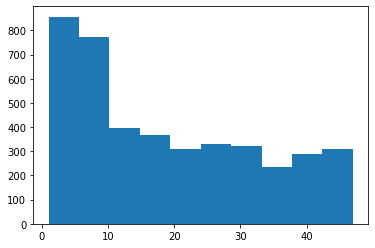

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [75]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [76]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [77]:
customer_join.to_csv("customer_join.csv", index=False)

In [78]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [79]:
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

클러스터링

In [80]:
customer_clustering = customer[["mean", "median","max", "min", "membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

[3 1 0 2]


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [82]:
customer_clustering.columns = ["월평균값","월중앙값", "월최댓값", "월최솟값","회원기간", "cluster"]
customer_clustering.groupby("cluster").count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1336,1336,1336,1336,1336
1,761,761,761,761,761
2,846,846,846,846,846
3,1249,1249,1249,1249,1249


In [83]:
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,5.522518,5.373129,8.743263,2.686377,14.831587
1,3.051243,2.885677,4.750329,1.653088,9.269382
2,8.054608,8.039598,10.009456,6.160757,7.072104
3,4.677494,4.671337,7.232986,2.153723,36.915933


In [84]:
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

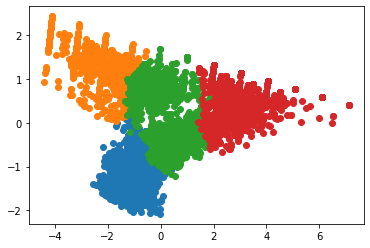

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [86]:
customer_clustering = pd.concat([customer_clustering, customer], axis=1)
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,785
1,0,1,551
2,1,1,761
3,2,0,827
4,2,1,19
5,3,0,1230
6,3,1,19


In [87]:
customer_clustering.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,229
1,0,1,1107
2,1,0,496
3,1,1,265
4,2,0,52
5,2,1,794
6,3,0,2
7,3,1,1247
